# Task 6

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv('D:\\Study\\Parul University\\PUStudy\\4th sem\\#Data Science With Python\\#Internship\\Task\\6\\Walmart Data Analysis and Forcasting.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [3]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment'],
      dtype='object')

In [4]:
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
df.tail()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667
6434,45,26-10-2012,760281.43,0,58.85,3.882,192.308899,8.667


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [8]:
# Calculate summary statistics for a specific column
sales_stats = df['Weekly_Sales'].describe()
print("\nWeekly Sales Statistics:")
sales_stats


Weekly Sales Statistics:


count    6.435000e+03
mean     1.046965e+06
std      5.643666e+05
min      2.099862e+05
25%      5.533501e+05
50%      9.607460e+05
75%      1.420159e+06
max      3.818686e+06
Name: Weekly_Sales, dtype: float64

In [9]:
#identify missing values
df.isnull().sum().sum()

0

In [10]:
# Add a new column 'Sales_Per_Temperature'
df['Sales_Per_Temperature'] = df['Weekly_Sales'] / df['Temperature']
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Per_Temperature
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,38848.756795
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,42637.170605
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,40369.851490
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,30232.202230
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,33436.702796


In [11]:
# Filter data: Select rows where 'Holiday_Flag' is 1 (holiday weeks)
holiday_data = df[df['Holiday_Flag'] == 1]
print("Data for Holiday Weeks:")
holiday_data

Data for Holiday Weeks:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Per_Temperature
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106,42637.170605
31,1,10-09-2010,1507460.69,1,78.69,2.565,211.495190,7.787,19156.953743
42,1,26-11-2010,1955624.11,1,64.52,2.735,211.748433,7.838,30310.355084
47,1,31-12-2010,1367320.01,1,48.43,2.943,211.404932,7.838,28232.913690
53,1,11-02-2011,1649614.93,1,36.39,3.022,212.936705,7.742,45331.545205
...,...,...,...,...,...,...,...,...,...
6375,45,09-09-2011,746129.56,1,71.48,3.738,186.673738,8.625,10438.298265
6386,45,25-11-2011,1170672.94,1,48.71,3.492,188.350400,8.523,24033.523712
6391,45,30-12-2011,869403.63,1,37.79,3.389,189.062016,8.523,23006.182323
6397,45,10-02-2012,803657.12,1,37.00,3.640,189.707605,8.424,21720.462703


In [12]:
df.Holiday_Flag.sum()

450

In [13]:
# Filter data: Select rows where 'Non Holiday_Flag' is 1 (holiday weeks)
non_holiday_data = df[df['Holiday_Flag'] == 0]
print("Data for Non Holiday Weeks:")
non_holiday_data

Data for Non Holiday Weeks:


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Sales_Per_Temperature
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106,38848.756795
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106,40369.851490
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106,30232.202230
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106,33436.702796
5,1,12-03-2010,1439541.59,0,57.79,2.667,211.380643,8.106,24909.873508
...,...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684,10992.200216
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667,11303.052396
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667,13483.832568
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667,12716.938729


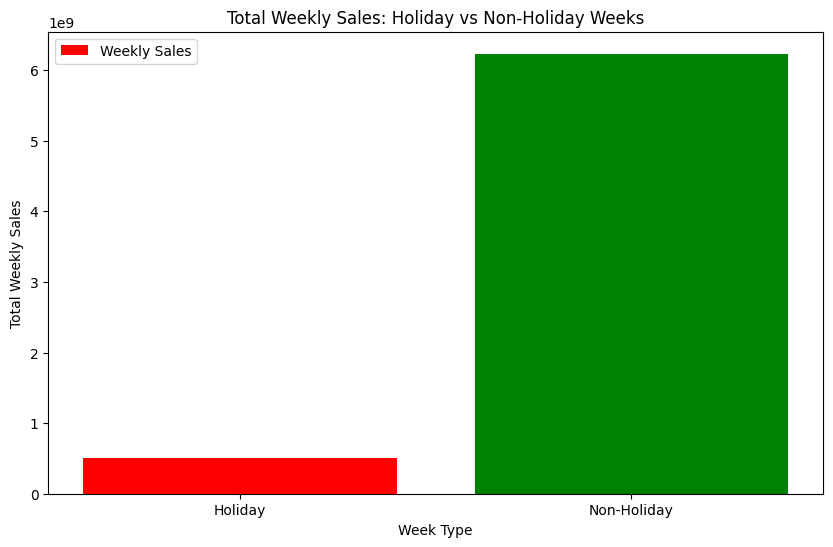

In [14]:
# Calculate total weekly sales for each
total_holiday_sales = holiday_data['Weekly_Sales'].sum()
total_non_holiday_sales = non_holiday_data['Weekly_Sales'].sum()

# Data for the bar chart
categories = ['Holiday', 'Non-Holiday']
sales = [total_holiday_sales, total_non_holiday_sales]


# Create the bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, sales, color=['Red', 'Green'])
plt.xlabel('Week Type')
plt.ylabel('Total Weekly Sales')
plt.title('Total Weekly Sales: Holiday vs Non-Holiday Weeks')
plt.legend(['Weekly Sales'])
plt.show()

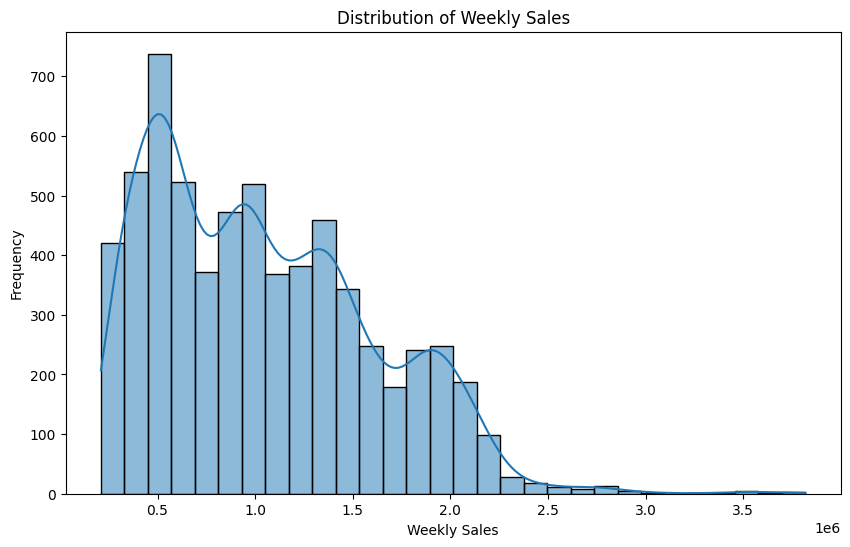

In [15]:
# Histogram for distribution of Weekly_Sales
plt.figure(figsize=(10, 6))
sns.histplot(df['Weekly_Sales'], bins=30, kde=True)
plt.xlabel('Weekly Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Weekly Sales')
plt.show()

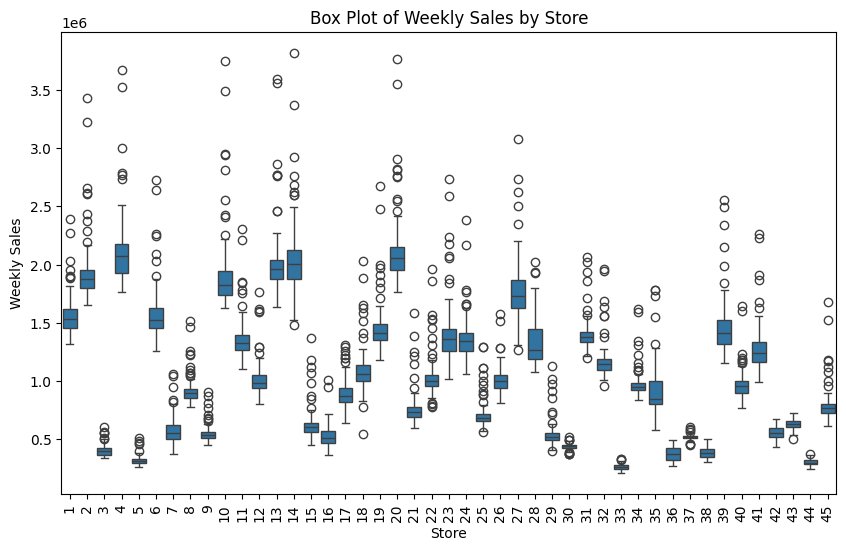

In [16]:
# Box plot to identify outliers in Weekly_Sales by Store
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store', y='Weekly_Sales', data=df)
plt.xlabel('Store')
plt.ylabel('Weekly Sales')
plt.title('Box Plot of Weekly Sales by Store')
plt.xticks(rotation=90)
plt.show()

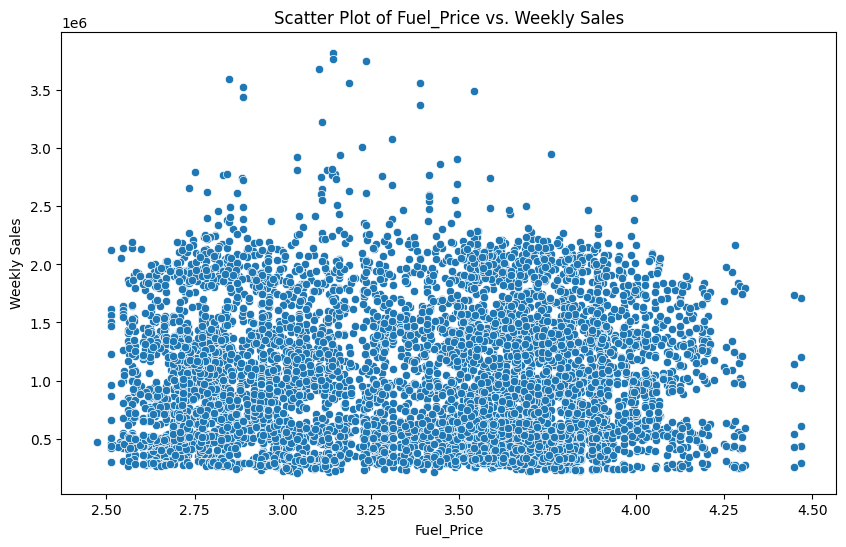

In [17]:
# relationship between two continuous variables.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Fuel_Price', y='Weekly_Sales', data=df)
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly Sales')
plt.title('Scatter Plot of Fuel_Price vs. Weekly Sales')
plt.show()


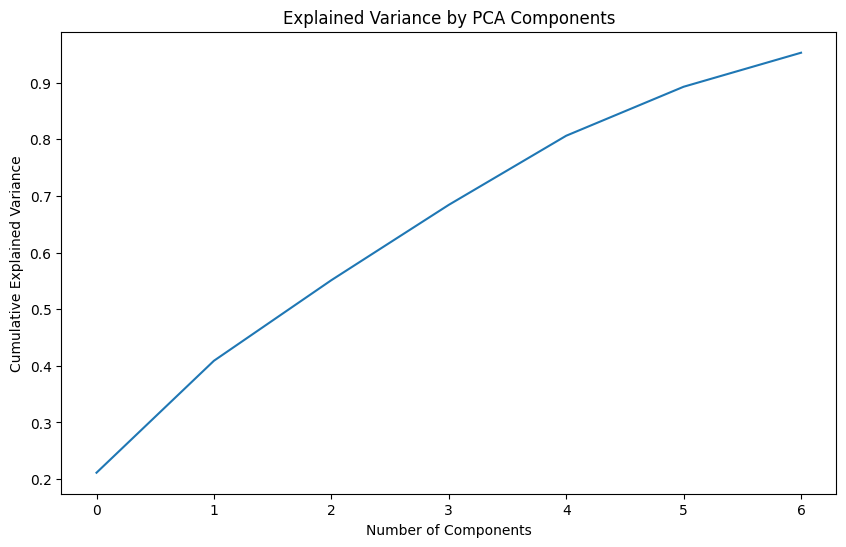

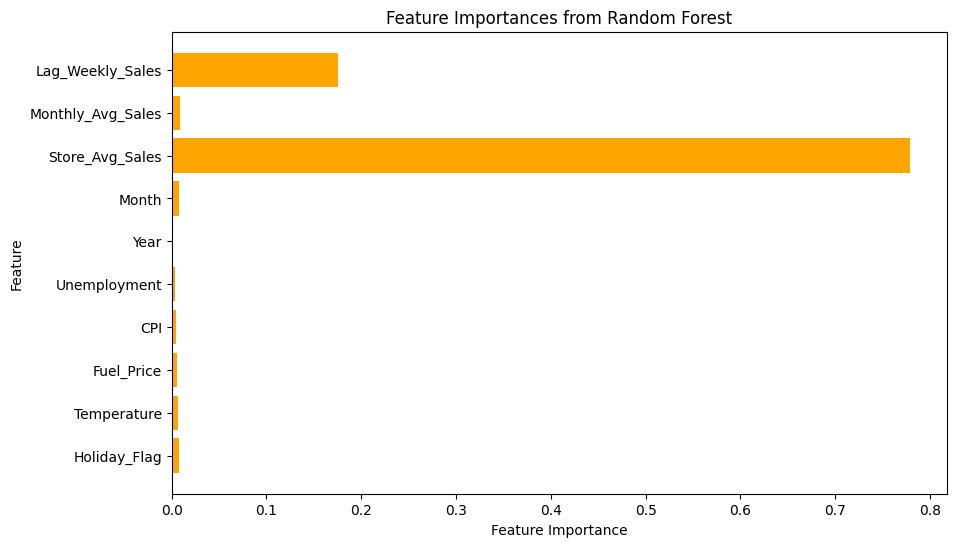

,Store_Avg_Sales,Lag_Weekly_Sales,Monthly_Avg_Sales,Month,Holiday_Flag
1,1.555264e+06,1643690.90,1.053200e+06,2,1
2,1.555264e+06,1641957.44,1.053200e+06,2,0
3,1.555264e+06,1611968.17,1.053200e+06,2,0
4,1.555264e+06,1409727.59,1.013309e+06,3,0
5,1.555264e+06,1554806.68,1.013309e+06,3,0


In [18]:
# Feature Engineering
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Average sales per store
store_avg_sales = df.groupby('Store')['Weekly_Sales'].transform('mean')
df['Store_Avg_Sales'] = store_avg_sales

# Average sales per month
monthly_avg_sales = df.groupby('Month')['Weekly_Sales'].transform('mean')
df['Monthly_Avg_Sales'] = monthly_avg_sales

# Lag features (sales from the previous week)
df['Lag_Weekly_Sales'] = df['Weekly_Sales'].shift(1)
df = df.dropna()  # Drop the first row with NaN lag value

# Feature selection using PCA
features = ['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment', 'Year', 'Month', 'Store_Avg_Sales', 'Monthly_Avg_Sales', 'Lag_Weekly_Sales']
X = df[features]
y = df['Weekly_Sales']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plot explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA Components')
plt.show()

# Feature importance using Random Forest
model = RandomForestRegressor()
model.fit(X, y)
importances = model.feature_importances_

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='orange')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.show()

# Select the most important features
important_features = pd.Series(importances, index=features).nlargest(5).index
X_selected = df[important_features]

# Display the selected features
X_selected.head()

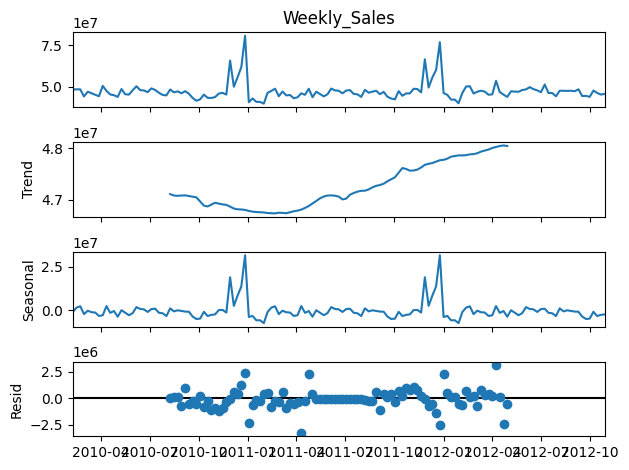

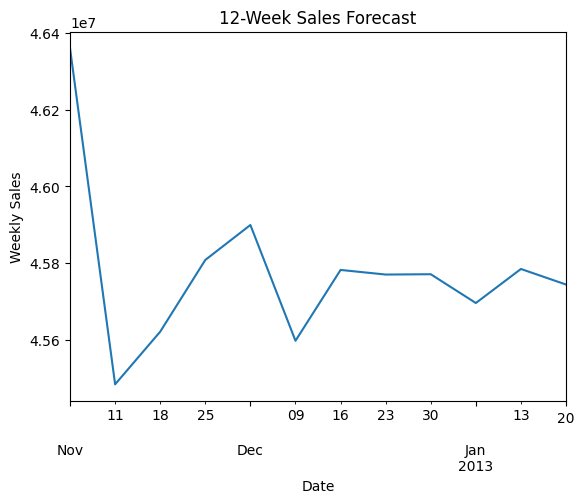

In [19]:
# Time Series Analysis
# Convert the Date column to datetime format and set as index
df.loc[:, 'Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.set_index('Date', inplace=True)

# Aggregate weekly sales data for all stores
weekly_sales = df['Weekly_Sales'].resample('W').sum()

# Perform seasonal decomposition
decomposition = seasonal_decompose(weekly_sales, model='additive')
decomposition.plot()
plt.show()

# Fit ARIMA model
arima_model = ARIMA(weekly_sales, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast the next 12 weeks
forecast = arima_result.forecast(steps=12)
forecast.plot()
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('12-Week Sales Forecast')
plt.show()

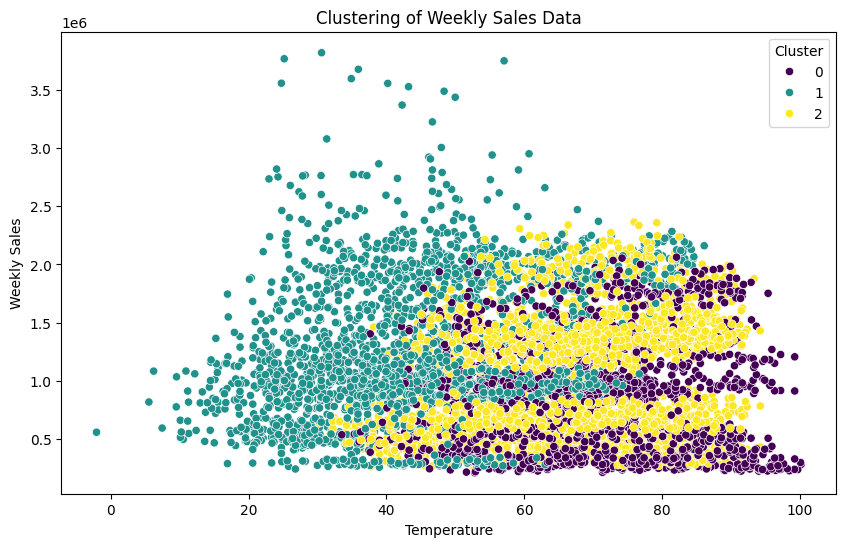

In [21]:
# Clustering Techniques Code
# Select relevant columns for clustering
clustering_data = df[['Weekly_Sales', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]

# Normalize the data
scaler = StandardScaler()
clustering_data_normalized = scaler.fit_transform(clustering_data)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(clustering_data_normalized)

# Add cluster labels to the original dataframe using .loc
df.loc[:, 'Cluster'] = clusters

# Visualize the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Temperature', y='Weekly_Sales', hue='Cluster', palette='viridis')
plt.title('Clustering of Weekly Sales Data')
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.show()